In [1]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [2]:
def split_document(text, max_length=250, overlap=50):
    # Split text into words
    words = text.split()
    parts = []
    if len(words) <= max_length:
        return [text]  # Return the entire text if it's short enough

    i = 0
    while i < len(words):
        # Ensure that we don't exceed the text length
        end_index = min(i + max_length, len(words))
        # Join the selected range of words back into a string
        chunk_text = " ".join(words[i:end_index])
        parts.append(chunk_text)
        i += (max_length - overlap)
    
    return parts

In [3]:
def load_data(directory_paths):
    texts, labels = [], []
    for dialect, directory in directory_paths.items():
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='latin-1') as file:
                text = file.read().strip()
                text = re.sub(r'\d+', '', text)  # Remove numbers
                
                # Apply chunking
                chunks = split_document(text)
                i = 0
                for chunk in chunks:
                    if i >= 40: 
                        break # doing this because the dataset is really uneven right now, so it is always classifying as like 2 dialects
                    texts.append(chunk)
                    labels.append(dialect)  # Each chunk gets the same label as the original document
                    i+=1

    return texts, labels


def preprocess_texts(texts):
    # Define a tokenizer function
    def tokenize(text):
        # Simple tokenization based on whitespace
        return text.split()

    # Initialize a TF-IDF Vectorizer without using stop words
    vectorizer = TfidfVectorizer(tokenizer=tokenize)
    features = vectorizer.fit_transform(texts)
    return features, vectorizer



def train_model(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))





In [4]:
# no bibles version

directory_paths_no_bibles = {
    # 'other': '../language_resources/dialects_no_bible/other_quechua/',
    'quh': '../language_resources/dialects_no_bible/quh',
    'quk': '../language_resources/dialects_no_bible/quk',
    'qux': '../language_resources/dialects_no_bible/qux',
    'quy': '../language_resources/dialects_no_bible/quy',
    'quz': '../language_resources/dialects_no_bible/quz', 
    'qwh': '../language_resources/dialects_no_bible/qwh',
    'qxo': '../language_resources/dialects_no_bible/qxo'
    # 'southern': '../language_resources/dialects_no_bible/southern_quechua'
}

texts, labels = load_data(directory_paths_no_bibles)
features, vectorizer = preprocess_texts(texts)

/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
print(f"Loaded {len(texts)} texts and {len(labels)} labels.")
print(f"Features shape: {features.shape}")
print(f"Number of labels: {len(labels)}")

Loaded 1585 texts and 1585 labels.
Features shape: (1585, 78676)
Number of labels: 1585


In [6]:
train_model(features, labels)

Accuracy: 0.7886435331230284
Classification Report:
               precision    recall  f1-score   support

         quh       0.74      0.88      0.80       140
         quk       0.00      0.00      0.00         3
         qux       0.98      0.85      0.91        52
         quy       0.00      0.00      0.00         6
         quz       0.78      0.86      0.82        91
         qwh       1.00      0.07      0.12        15
         qxo       1.00      0.40      0.57        10

    accuracy                           0.79       317
   macro avg       0.64      0.44      0.46       317
weighted avg       0.79      0.79      0.76       317



/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.7886435331230284
Classification Report:
               precision    recall  f1-score   support

         quh       0.74      0.88      0.80       140
         quk       0.00      0.00      0.00         3
         qux       0.98      0.85      0.91        52
         quy       0.00      0.00      0.00         6
         quz       0.78      0.86      0.82        91
         qwh       1.00      0.07      0.12        15
         qxo       1.00      0.40      0.57        10

    accuracy                           0.79       317
   macro avg       0.64      0.44      0.46       317
weighted avg       0.79      0.79      0.76       317



<Figure size 1000x1000 with 0 Axes>

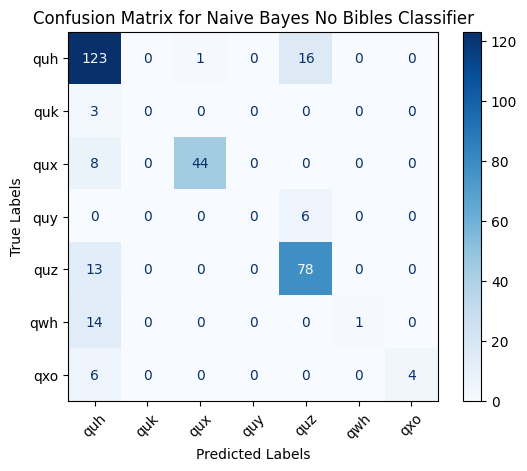

In [7]:
def train_model(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    plt.figure(figsize=(10, 10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for Naive Bayes No Bibles Classifier')
    plt.xticks(rotation=45)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

train_model(features,labels)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume 'texts' and 'labels' are loaded and preprocessed
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

model = MultinomialNB()
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation accuracy:", scores.mean())


Accuracy scores for each fold: [0.74763407 0.70662461 0.59621451 0.6340694  0.70347003]
Mean cross-validation accuracy: 0.6776025236593061


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Assume 'texts' and 'labels' are loaded and prepared
vectorizer = TfidfVectorizer()
model = MultinomialNB()

# Create a pipeline
pipeline = make_pipeline(vectorizer, model)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, texts, labels, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)

CV Scores: [0.78548896 0.70662461 0.60883281 0.65930599 0.71293375]


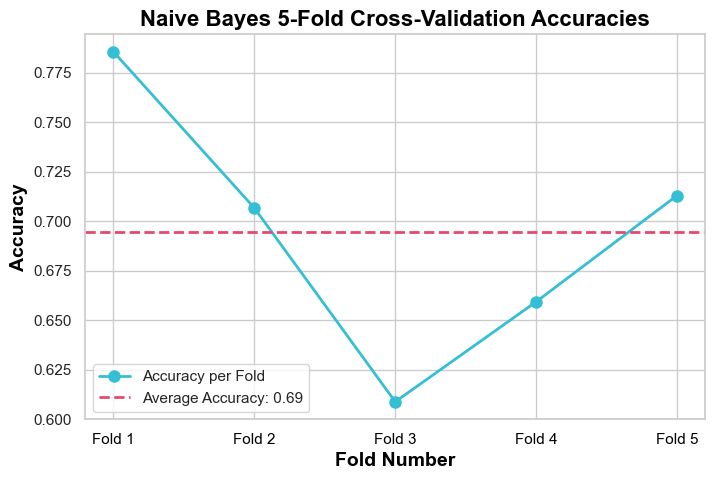

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns  # for a nicer styling

def plot_cv_scores(cv_scores):
    # Set the seaborn style for better aesthetics
    sns.set(style="whitegrid")

    fig, ax = plt.subplots(figsize=(8, 5))  # Bigger size for better readability
    ax.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='#35BFD4', markersize=8, linewidth=2, label='Accuracy per Fold')
    
    # Adding average line
    avg_score = sum(cv_scores) / len(cv_scores)
    ax.axhline(y=avg_score, color='#E34A6F', linestyle='--', linewidth=2, label=f'Average Accuracy: {avg_score:.2f}')

    # Titles and labels
    ax.set_title('Naive Bayes 5-Fold Cross-Validation Accuracies', fontsize=16, fontweight='bold', color='black')
    ax.set_xlabel('Fold Number', fontsize=14, fontweight='bold', color='black')
    ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold', color='black')
    ax.set_xticks(range(1, len(cv_scores) + 1))
    ax.set_xticklabels([f"Fold {i}" for i in range(1, len(cv_scores) + 1)], color='black')

    # Adding a legend
    ax.legend(loc='lower left')

    plt.show()

plot_cv_scores(cv_scores)


In [11]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt


report = classification_report(true_labels, predictions, target_names=directory_paths_no_bibles.keys(), output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)  # Drop averages/total
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title('Classification Report for Each Class')
plt.ylabel('Score')
plt.show()


NameError: name 'true_labels' is not defined